In [124]:
import pandas as pd

In [125]:
from pathlib import Path

In [126]:
data_dir = Path(f"cluster-test-data-2020-10-13/")
dfs = {
    str(f.name): pd.read_csv(f)
    for f in data_dir.glob("*.csv")
}
len(dfs)

8

In [127]:
for name, _df in dfs.items():
    if "k2-decay" in name:
        print("k2")
        _df["name"] = "hsgd2"
    elif "k1-decay" in name:
        print("k1")
        _df["name"] = "hsgd1"
[df.name.iloc[-1] for df in dfs.values()]

k2
k1


['asgd', 'hsgd2', 'pada', 'hsgd1', 'padalr', 'hsgd', 'gd', 'geo']

In [128]:
df = pd.concat(dfs)

In [129]:
df.columns

Index(['Unnamed: 0', 'partial_fit_calls', 'test_acc', 'test_loss', 'train_acc',
       'train_loss', 'train_eg', 'test_eg', 'max_iter', 'damper_name',
       'device', 'lr', 'max_batch_size', 'momentum', 'name', 'opt', 'scoring',
       'seed', 'weight_decay', 'model_updates', 'num_examples', 'len_dataset',
       'epochs', 'ident', 'acc', 'loss', 'damping', 'batch_size', 'lr_',
       'batch_growth_rate', 'dwell', 'initial_batch_size', 'pada_damping',
       'static_batch_size', 'dampingdelay', 'dampingfactor'],
      dtype='object')

(0.67, 0.77)

(0.9, 3159804.7735127327)

(0.9, 3159804.7735127327)

(0.54, 0.75)

(1000, 3159804.7735127327)

(0.67, 0.77)

(0.54, 0.75)

(0, 3000)

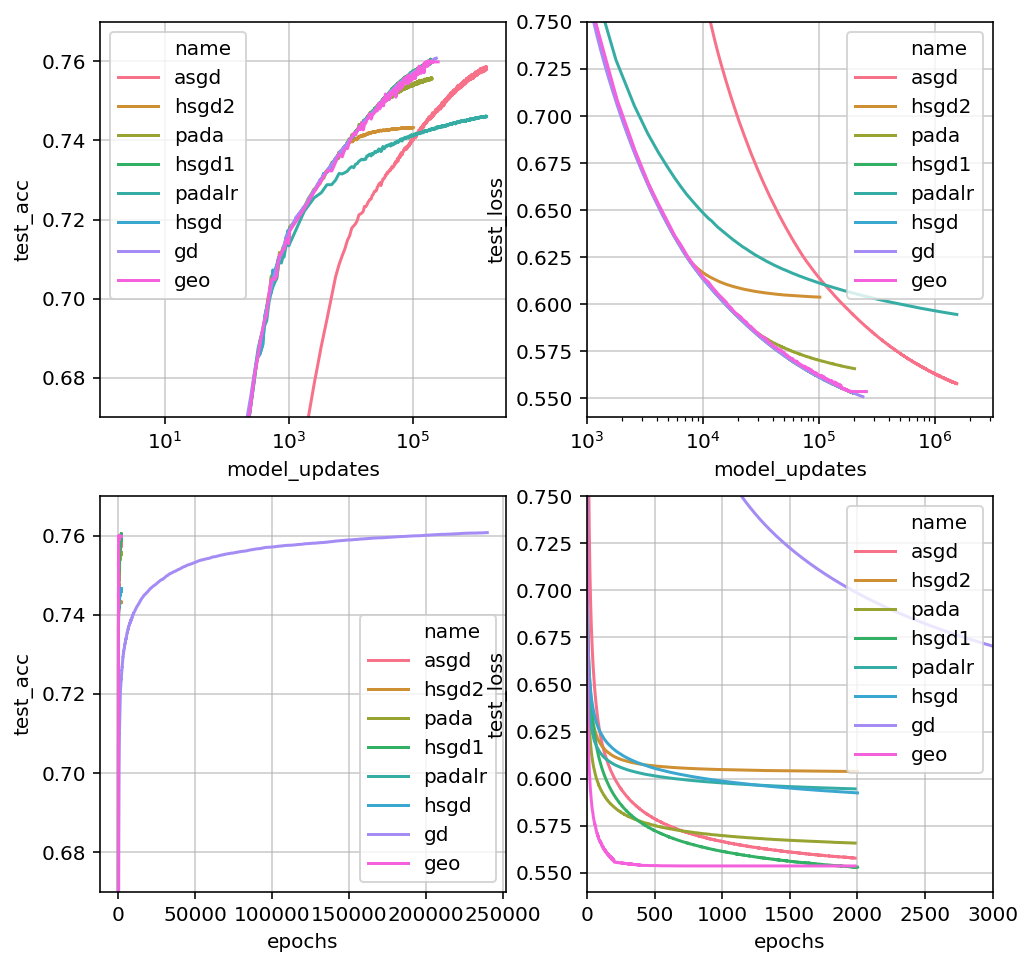

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

w = 4
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(2 * w, 2 * w))

for i, x in enumerate(["model_updates", "epochs"]):
    for j, y in enumerate(["test_acc", "test_loss"]):
#     for j, y in enumerate(["train_acc", "train_loss"]):
        ax = sns.lineplot(
            x=x,
            y=y,
            hue="name",
            data=df,
            ax=axs[i][j],
            ci=None,
        )
        ax.grid(alpha=0.65)
        if "acc" in y:
            ax.set_ylim(0.67, 0.77)
            
#         elif "loss" in y:
#             ax.set_ylim(0.7, 1)
        if "updates" in x:
            ax.set_xscale("log", basex=10)
            ax.set_xlim(0.9, None)
        if "loss" in y:
            ax.set_xscale("log")
            ax.set_ylim(0.54, 0.75)
            if "updates" in x:
                ax.set_xlim(1000, None)
            else:
                ax.set_xscale("linear")
                ax.set_xlim(0, 3000)
        # ax.set_ylim(0.7, 1)

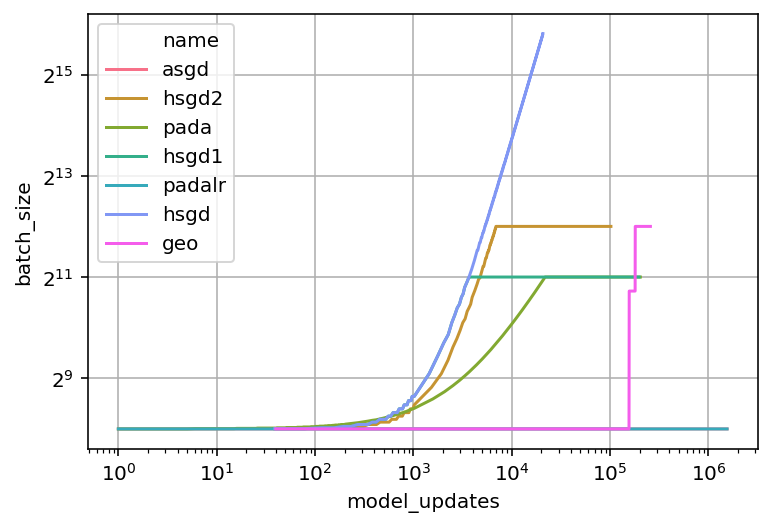

In [131]:
import seaborn as sns
ax = sns.lineplot(
    x="model_updates",
    y="batch_size",
    hue="name",
    data=df[df.name != "gd"],
)
ax.set_yscale("log", basey=2)
ax.set_xscale("log")
ax.grid()

In [132]:
show = df.copy()
show["damper_name_show"] = show["damper_name"]

show.loc[show.name == "pada", "damper_name_show"] = "PadaDamp"
show.loc[show.name == "padalr", "damper_name_show"] = "SGD"
show.loc[show.name == "gd", "damper_name_show"] = "GD"
show.loc[show.name == "asgd", "damper_name_show"] = "ASGD"
show.loc[show.name == "hsgd1", "damper_name_show"] = "HSGD-1"
show.loc[show.name == "hsgd2", "damper_name_show"] = "HSGD-2"
show.loc[show.name == "hsgd2", "damper_name_show"] = "HSGD"
# n = 

In [282]:
import numpy as np

## Paper figures
DAMPERS = ["padalr", "hsgd", "geo", "gd", "pada", "asgd"]
COLORS =  ["C0",     "C1",   "C5",  "C3", "C2",   "C4"]
STYLES =  ["-",      "-.",    ":",    ":", "-", "-"]
WIDTHS = [2] * 7

## Appendix figures
DAMPERS = ["padalr", "hsgd", "geo", "gd", "pada", "asgd", "hsgd1", "hsgd2"]
COLORS =  ["C0",     "C1",   "C5",  "C3", "C2",   "C4", "C0", "C1"]
STYLES =  ["-",      "-.",    ":",    ":", "-", "-", ":", ":"]
WIDTHS = [2] * 9

LABELS = {
    "pada": "PadaDamp",
    "padalr": "SGD",
    "asgd": "ASGD",
    "gd": "GD",
    "geo": "GeoDamp",
    "hsgd1": "HSGD-1",
    "hsgd2": "HSGD-2",
    "hsgd": "HSGD",
}
ylim = (0.69, 0.77)

idx = 5
# print(DAMPERS[idx], STYLES[idx], COLORS[idx])
# assert len(STYLES) == len(COLORS) == len(DAMPERS), [len(x) for x in [COLORS, STYLES, DAMPERS]]

In [250]:
len(COLORS)

6

In [251]:
len(DAMPERS)

6

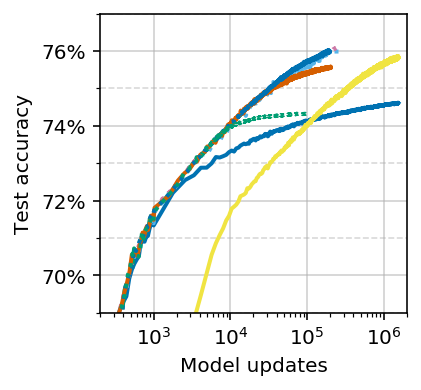

In [283]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-colorblind")

def lineplot(
    df,
    x,
    y,
    labels=None,
    hue_order=None,
    hues=None,
    styles=None,
    w=3,
    fig_ax=None,
    widths=None,
):
    if fig_ax is None:
        fig, ax = plt.subplots(figsize=(w, w))
    else:
        fig, ax = fig_ax
    if hue_order is None:
        hue_order = sorted(df.name.unique())
    if labels is None:
        labels = {}
    if widths is None:
        widths = [1] * len(hue_order)
    for k, d in enumerate(hue_order):
        label = labels.get(d, d)
        s = df[df.name == d]
        if not len(s):
            continue
        ax = s.plot(
            x=x,
            y=y,
            style=hues[k],
            linestyle=styles[k],
            ax=ax,
            label=label,
            linewidth=widths[k],
        )
    return fig, ax

x = "model_updates"
y = "test_acc"

w = 2.75
kwargs = dict(hues=COLORS, hue_order=DAMPERS, styles=STYLES, labels=LABELS, w=w, widths=WIDTHS)
fig, ax = lineplot(show, x, y, **kwargs)
ax.set_ylim(*ylim)
ax.grid(alpha=0.6)
ax.set_ylabel("Test accuracy")
ax.set_xlabel("Model updates")
ax.set_xlim(0.2e3, 2e6)
ax.set_xscale("log", basex=10)
# ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f"{int(v):,}" if v > 0 else "0"))
# ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f"{int(v / 1e3)}e3" if v > 0 else "0"))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f"{int(v * 100)}%"))
odd_percs = np.arange(50) * 2 + 1
ax.yaxis.set_minor_locator(plt.FixedLocator(odd_percs / 100))
ax.grid(alpha=0.5, which="minor", axis="y", linestyle="--")
ax.legend_.remove()
# ax.legend(loc="lower right")
# ax.legend?o
fig.savefig("padadamp-mu.pdf", bbox_inches="tight")


In [284]:
df[df.name == "geo"]

Unnamed: 0  partial_fit_calls  test_acc  test_loss  \
geo-test-data-v0.csv 0            0.0                  0  0.111283   2.217038   
                     1            1.0                  1  0.536490   1.694106   
                     2            2.0                  2  0.631295   1.411170   
                     3            3.0                  3  0.644880   1.258897   
                     4            4.0                  4  0.654310   1.160504   
...                               ...                ...       ...        ...   
                     1997      1997.0               1997  0.759876   0.553623   
                     1998      1998.0               1998  0.759876   0.553623   
                     1999      1999.0               1999  0.759876   0.553623   
                     2000      2000.0               2000  0.759876   0.553623   
                     2001      2001.0               2001  0.759876   0.553623   

                           train_acc  train_loss  train_eg  test_eg  max_iter  \
geo-test-data-v0.csv 0      0.112255    2.217094    200000   381012      2000   
                     1      0.537435    1.693169    200000   381012      2000   
                     2      0.631890    1.408679    200000   381012      2000   
                     3      0.646520    1.255722    200000   381012      2000   
                     4      0.656390    1.156835    200000   381012      2000   
...                              ...         ...       ...      ...       ...   
                     1997   0.762760    0.546458    200000   381012      2000   
                     1998   0.762760    0.546458    200000   381012      2000   
                     1999   0.762760    0.546458    200000   381012      2000   
                     2000   0.762760    0.546458    200000   381012      2000   
                     2001   0.762760    0.546458    200000   381012      2000   

                          damper_name  ...       damping  batch_size  \
geo-test-data-v0.csv 0        geodamp  ...           NaN         NaN   
                     1        geodamp  ...  2.560000e+02       256.0   
                     2        geodamp  ...  2.560000e+02       256.0   
                     3        geodamp  ...  2.560000e+02       256.0   
                     4        geodamp  ...  2.560000e+02       256.0   
...                               ...  ...           ...         ...   
                     1997     geodamp  ...  6.122993e+09      4096.0   
                     1998     geodamp  ...  6.122993e+09      4096.0   
                     1999     geodamp  ...  6.122993e+09      4096.0   
                     2000     geodamp  ...  6.122993e+09      4096.0   
                     2001     geodamp  ...  6.122993e+09      4096.0   

                                    lr_  batch_growth_rate dwell  \
geo-test-data-v0.csv 0              NaN                NaN   NaN   
                     1     9.000000e-04                NaN   NaN   
                     2     9.000000e-04                NaN   NaN   
                     3     9.000000e-04                NaN   NaN   
                     4     9.000000e-04                NaN   NaN   
...                                 ...                ...   ...   
                     1997  6.020585e-10                NaN   NaN   
                     1998  6.020585e-10                NaN   NaN   
                     1999  6.020585e-10                NaN   NaN   
                     2000  6.020585e-10                NaN   NaN   
                     2001  6.020585e-10                NaN   NaN   

                          initial_batch_size pada_damping  static_batch_size  \
geo-test-data-v0.csv 0                 256.0          NaN                NaN   
                     1                 256.0          NaN                NaN   
                     2                 256.0          NaN                NaN   
                     3                 256.0          NaN                NaN   

In [285]:
acc = 0.745
print(acc)
out = []
for name in df.name.unique():
    s = df[(df.name == name) & (df.test_acc >= acc)]
    print(name, len(s))
    if len(s) == 0:
        continue
    idx = np.abs(s.test_acc - acc).idxmin()
    mu = s.loc[idx, "model_updates"]
    epochs = s.loc[idx, "epochs"]
    test_acc = s.loc[idx, "test_acc"]
    out.append({"name": name, "epochs": epochs, "test_acc": test_acc, "model_updates": mu, "acc": acc})
out

0.745
asgd 1763
hsgd2 0
pada 1898
hsgd1 1843
padalr 1080
hsgd 835
gd 2232
geo 1954


[{'name': 'asgd',
  'epochs': 224.49536,
  'test_acc': 0.7450762705636568,
  'model_updates': 175387,
  'acc': 0.745},
 {'name': 'pada',
  'epochs': 75.72639000000001,
  'test_acc': 0.7450762705636568,
  'model_updates': 16353,
  'acc': 0.745},
 {'name': 'hsgd1',
  'epochs': 152.09795,
  'test_acc': 0.7450788951529086,
  'model_updates': 16970,
  'acc': 0.745},
 {'name': 'padalr',
  'epochs': 847.09248,
  'test_acc': 0.7450027820646069,
  'model_updates': 661791,
  'acc': 0.745},
 {'name': 'hsgd',
  'epochs': 1054.04845,
  'test_acc': 0.7450027820646069,
  'model_updates': 16719,
  'acc': 0.745},
 {'name': 'gd',
  'epochs': 16900.0,
  'test_acc': 0.7450106558323623,
  'model_updates': 16900,
  'acc': 0.745},
 {'name': 'geo',
  'epochs': 23.352320000000002,
  'test_acc': 0.745241619686519,
  'model_updates': 18244,
  'acc': 0.745}]

In [286]:
s = show[show.name == "gd"]
idx = np.abs(s.test_acc - 0.75).idxmin()
s.loc[idx, "epochs"]

32100.0

In [287]:
o = pd.DataFrame(out)
o = o[["name", "epochs", "model_updates"]]
o = o.sort_values(by="epochs")
o

,name,epochs,model_updates
6,geo,23.35232,18244
1,pada,75.72639,16353
2,hsgd1,152.09795,16970
0,asgd,224.49536,175387
3,padalr,847.09248,661791
4,hsgd,1054.04845,16719
5,gd,16900.00000,16900


In [288]:
print(o.to_latex())

\begin{tabular}{llrr}
\toprule
{} &    name &       epochs &  model\_updates \\
\midrule
6 &     geo &     23.35232 &          18244 \\
1 &    pada &     75.72639 &          16353 \\
2 &   hsgd1 &    152.09795 &          16970 \\
0 &    asgd &    224.49536 &         175387 \\
3 &  padalr &    847.09248 &         661791 \\
4 &    hsgd &   1054.04845 &          16719 \\
5 &      gd &  16900.00000 &          16900 \\
\bottomrule
\end{tabular}



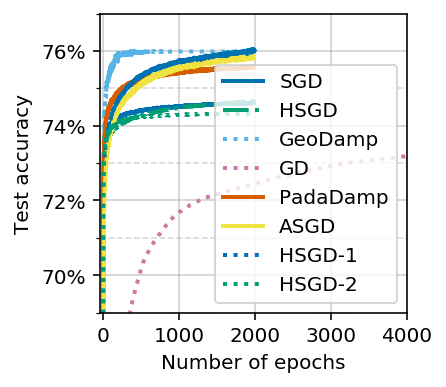

In [289]:
show["epochs"] = show["num_examples"] / show["len_dataset"]
x = "epochs"
y = "test_acc"

kwargs["widths"] = [np.median(kwargs["widths"])] * len(kwargs["widths"])

show["num_examples_show"] = show["num_examples"] / 1e6
fig, ax = lineplot(show, x, y, **kwargs)

ax.set_ylim(*ylim)
ax.grid(alpha=0.6)
ax.set_ylabel("Test accuracy")
# ax.set_xlabel("Number of epochs")
ax.set_xlabel("Number of epochs")
ax.set_xlim(-40.5, 4e3)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f"{int(v * 100)}%"))
# ax.xaxis.set_major_locator(plt.MultipleLocator(500))
odd_percs = np.arange(50) * 2 + 1
ax.yaxis.set_minor_locator(plt.FixedLocator(odd_percs / 100))

odd_percs = np.arange(50) * 2 + 1
# ax.yaxis.set_minor_locator(plt.FixedLocator(odd_percs / 100))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.02))
ax.grid(alpha=0.5, which="minor", linestyle="--")
ax.legend(loc="lower right")
# ax.set_ylim(0.65, None)
# ax.set_xlim(1, None)
# ax.set_xscale("log")
fig.savefig("padadamp-epochs.pdf", bbox_inches="tight")


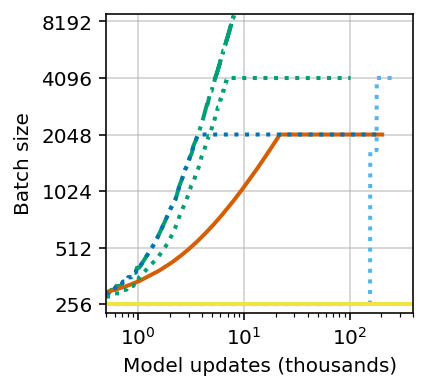

In [290]:
import numpy as np
x = "model_updates_show"
y = "batch_size"

show["model_updates_show"] = show["model_updates"] / 1e3
fig, ax = plt.subplots(figsize=(w, w))

fig, ax = lineplot(
    show[show.name != "gd"],
    x,
    y,
    **kwargs,
    fig_ax=(fig, ax),
)
# ax.set_ylim(0.68, 0.77)
ax.grid(alpha=0.6)
ax.set_ylabel("Batch size")
ax.set_xlabel("Model updates (thousands)")
# ax.set_yscale("log", basey=2)
# ys = [32 * i for i in range(10)]
# ys = [2**i for i in [6, 6.5, 7, 7.5]]
# ax.yaxis.set_major_locator(plt.FixedLocator(ys))

def y_fmt(v, _):
    pwr = np.log2(v)
    if np.allclose(pwr, np.floor(pwr)):
        pwr = int(pwr)
    return "$2^{{{}}}$".format(pwr)

# ax.yaxis.set_major_formatter(plt.FuncFormatter(y_fmt))
# ax.set_xscale("log", basex=10)
# ax.set_ylim(None, 2**8)
# ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f"{int(v / 1e3)}e3" if v > 0 else "0"))
# ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f"{int(v):,}" if v > 0 else "0"))
if False:
    ax.set_yscale("log", basey=2)
    ax.set_ylim(None, 2**12)
else:
    ax.set_xlim(0.5, 400)
    ax.set_xscale("log")
    ax.set_yscale("log", basey=2)
    mbs = 4096 * 2
#     mbs = 2048
    ax.set_ylim(0.9 * 256, 1.1 * mbs)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: str(int(x))))
    ax.yaxis.set_major_locator(plt.FixedLocator([128, 256, 512, 1024, 2048, 4096, 8192]))
    ax.legend_.remove()
fig.savefig("padadamp-bs.pdf", bbox_inches="tight")


In [272]:
!open .